# 数据预处理

In [1]:
#导入相关库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 数据集与任务介绍
本次实验使用的数据集是google store中，各个app下载的信息。共10841个样本，每个样本13个特征。

实验任务介绍：本次实验我们将利用app的类型（Category）、收费情况(Type)、大小（Size）、评分(Rating)、评价数量(Reviews)和分级(Content Rating)等特征来预测APP的下载量。

# 实验介绍及步骤

    实验介绍：本次实验我们将会对数据集进行相应的预处理工作，因为数据预处理的步骤相对灵活。我们会针对不同特征运用不同的预处理方法。这一个小节的实验，我们将处理一个特征维度的数据，以带领大家学习数据处理的基本语法。掌握了这些基本语法后，大家需要通过代码填空的方式自己动手实践处理数据。
    
    实验步骤：首先我们将对整理数据集进行缺失值处理，接下来我们将以Rating、Size和Price这两特征为例，进行数据预处理的教学。

# 一、数据预处理

## 1.1 数据读取

In [ ]:
raw_df = pd.read_csv("googleappstorev1.csv",index_col=0)#读取数据。index_col=0：读取时不自动添加行号。
raw_df.head()

## 1.2 缺失值处理

### ---------------------------------------------------1.2.1 查看缺失值-------------------------------------------

**pandas中，isnull()是常用的缺失值查看方法：**

    df.isnull():查看所有数据是否为缺失值，返回bool值。True：缺失值；False：不是缺失值。
    df.isnull().any():查看每个特征是否存在缺失值，返回bool值。
    df.isnll().sum():返回每个特征中缺失值的具体数量。

In [3]:
# 查看前5个样本中，数据是否为缺失值。
raw_df.head().isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [4]:
# 查看每个特征是否存在缺失值
raw_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
dtype: bool

In [5]:
raw_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

### 问题1：在介绍完三种查看缺失值的方法后，对于本次任务来说，哪种方法更加合适呢？
    .
    .
    .
    .
    .
    .
    .
    .

思路：我们可以选用isnull().any()或isnull().sum()方法，查看哪些特征数据包含缺失值。

### ----------------------------------------------------1.2.2 缺失值处理-----------------------------------------

缺失值处理的常见方法有：

    1.删除：dropna();
    2.填充：填充包括统计量填充（众数、均值、中位数）、KNN填充和回归预测填充等。常用方法包括：fillna()与Python的sklearn.preprocessing库中的Imputer类可对缺失值进行众数、均值、中位数填充。
    3.不处理

### 问题2：对于本次实验的数据集和任务，应该对于缺失值进行删除还是填充操作呢？
    .
    .
    .
    .
    .
    .
    .
    .

思路：包含缺失值的特征包括：Rating(1474)、Type(1)、Content Rating(1)、Current Ver(8)和Android Ver(3)。除了Rating，其他特征只对应少量缺失数据样本，因此对于这种数据我们可以优先考虑删除缺失数据。而Rating特征对应的缺失数据样本较多，我们优先考虑缺失值填充。

#### 1.2.2.1 缺失值填充

#### 方法1：统计量填充

本次实验我们选择统计量填充方法。统计量填充的选择标准：

    对于连续值，推荐使用中位数 ，可以排除一些特别大或者特别小的异常值造成的影响；
    对于离散值，推荐使用众数，均值和中位数没有意义，不能使用。

### 问题3：对于评分，我们应该哪种统计量填充方法呢？
    .
    .
    .
    .
    .
    .
    .
    .

思路：评分数据的连续的值，所以我们选择中位数填充。

使用Python中pandas库的dropna ( ) 函数，其基本格式如下：

    DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)

    关键参数详解：
    value: 特定填充值
    method: 差值方式：
        pad/ffill：用前一个非缺失值去填充该缺失值
        backfill/bfill：用下一个非缺失值填充该缺失值
        None：指定一个值去替换缺失值（缺省默认这种方式）
    axis: 默认为0。axis=0代表d对行数据进行操作，axis=1代表列数据
    inplace=True/False：Boolean数据, 默认为False。inplace=True代表直接对原数据集N做出修改。
    limit : 阈值。超过阈值才填充该行或该列。 

In [6]:
#将样本按照分类类别进行分组，求出每类中评分的中位数，再填充缺失值。
raw_df["Rating"] = raw_df["Rating"].fillna(raw_df["Rating"].median())
raw_df["Rating"]

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
5        4.4
6        3.8
7        4.1
8        4.4
9        4.7
10       4.4
11       4.4
12       4.2
13       4.6
14       4.4
15       3.2
16       4.7
17       4.5
18       4.3
19       4.6
20       4.0
21       4.1
22       4.7
23       4.3
24       4.7
25       4.8
26       4.7
27       4.1
28       3.9
29       4.1
        ... 
10811    4.3
10812    4.1
10813    4.3
10814    4.0
10815    4.2
10816    4.3
10817    4.0
10818    4.3
10819    3.3
10820    5.0
10821    4.3
10822    4.3
10823    4.3
10824    4.3
10825    4.3
10826    4.0
10827    4.2
10828    3.4
10829    4.6
10830    3.8
10831    4.3
10832    3.8
10833    4.8
10834    4.0
10835    4.3
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [7]:
#查看
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


#### 1.2.2.2 缺失值删除

使用Python中pandas库的dropna ( ) 函数，其基本格式如下：

    DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

    关键参数详解：
    axis=0/1，默认为0。axis=0代表d对行数据进行操作，axis=1代表列数据。
    how=any/all，默认为any。how=any代表若某行或某列中存在缺失值，则删除该行或该列。
    how=all:若某行或某列中数值全部为空，则删除该行或该列。
    thresh=N，可选参数，代表若某行或某列中至少含有N个缺失值，则删除该行或该列。
    subset=列名，可选参数，代表若指定列中有缺失值，则删除该行。
    inplace=True/False，Boolean数据, 默认为False。inplace=True代表直接对原数据集N做出修改。
    inplace=False代表修改后生成新数据集M，原数据集N保持不变。

In [38]:
#删除新数据集的所有缺失值
non_na_df = raw_df.dropna()
non_na_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity


In [39]:
#检查数据集中是否含有缺失值
non_na_df.isnull().any()#当删除掉不需要的行时，行索引会变的不连续，这时候可以重新设计新的索引
non_na_df.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新

In [40]:
#检查数据集中是否含有缺失值
non_na_df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
dtype: bool

以上，我们就完成了缺失值处理工作。

## 1.3 重复值处理 

pandas中，除去重复值的常用方法为drop_duplicate，其基本格式如下：

    DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)：
    关键参数详解：
    subset:用来指定特定的列，默认所有列；
    keep: {‘first’, ‘last’, False}。默认值为‘first’，用于删除重复项并保留第一次出现的项；
    inplace:是直接在原来数据上修改还是保留一个副本

In [41]:
non_na_df.drop_duplicates(inplace=True)
non_na_df

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity


重置样本标签

In [42]:
non_na_df.reset_index(drop= True,inplace = True)

## 1.4 异常值处理

异常值检测和处理异常值。
异常值检测的方法主要有：

    1. 简单统计分析； 
    2. 散点图；
    3. 箱型图；
    4. 3-sigma；
    5. 基于模型的异常值检测等。
异常值处理的方法主要包括：

    1. 删除；
    2. 视为缺失值，进行处理；
    3. 不处理：可以直接在具有异常值的数据集上进行数据建模。
    
下面我们将根据每一特征数据，来处理特征的异常值。处理的常用步骤为：

    1.查看特征的值；
    2.特征处理；
    3.异常值检测及处理。

### 特征1： Rating

查看数据基本信息。主要查看数值的动态范围和数据类型。

In [43]:
rating_copy = non_na_df.copy()
print(rating_copy["Rating"].to_frame().describe())
rating_copy["Rating"]

             Rating
count  10354.000000
mean       4.203738
std        0.485663
min        1.000000
25%        4.100000
50%        4.300000
75%        4.500000
max        5.000000


0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
5        4.4
6        3.8
7        4.1
8        4.4
9        4.7
10       4.4
11       4.4
12       4.2
13       4.6
14       4.4
15       3.2
16       4.7
17       4.5
18       4.3
19       4.6
20       4.0
21       4.1
22       4.7
23       4.3
24       4.7
25       4.8
26       4.7
27       4.1
28       3.9
29       4.1
        ... 
10324    4.3
10325    4.1
10326    4.3
10327    4.0
10328    4.2
10329    4.3
10330    4.0
10331    4.3
10332    3.3
10333    5.0
10334    4.3
10335    4.3
10336    4.3
10337    4.3
10338    4.3
10339    4.0
10340    4.2
10341    3.4
10342    4.6
10343    3.8
10344    4.3
10345    3.8
10346    4.8
10347    4.0
10348    4.3
10349    4.5
10350    5.0
10351    4.3
10352    4.5
10353    4.5
Name: Rating, Length: 10354, dtype: float64

评分数据是float32的，数值变化范围为1到5。数据的标准差为0.486，说明数据的扰动不大。

Text(0, 0.5, 'Frequency')

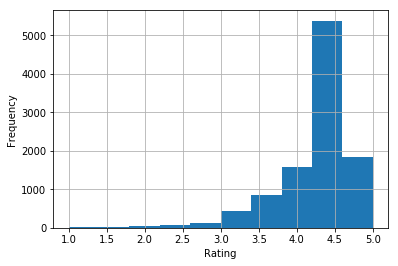

In [44]:
rating_copy["Rating"].hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

通过观察数据的统计数据和可视化，我们没有在评分数据中发现异常值。

### 特征2： Size

#### 查看特征信息

In [45]:
Size_copy = non_na_df.copy()
Size_copy["Size"].value_counts()

Varies with device    1525
11M                    188
12M                    186
13M                    186
14M                    182
15M                    174
17M                    155
26M                    145
16M                    143
19M                    135
10M                    133
25M                    131
20M                    131
21M                    130
24M                    128
18M                    124
23M                    109
22M                    108
29M                     95
27M                     94
28M                     92
30M                     84
33M                     78
3.3M                    76
37M                     72
31M                     69
2.5M                    68
35M                     68
2.3M                    68
2.9M                    67
                      ... 
953k                     1
154k                     1
785k                     1
743k                     1
245k                     1
913k                     1
9

#### 特征处理

size这个特征中，APP大小的单位不一致，且不是数值型的。因此我们首先需要统一单位，并将特征数据转换成数值型。

In [46]:
#定位单位为MB的数据
k_indices = Size_copy['Size'].loc[Size_copy['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(Size_copy.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
Size_copy.loc[k_indices,'Size'] = converter

In [47]:
Size_copy['Size'] = Size_copy['Size'].str.replace('M','')
#df_copy['Size'] = pd.to_numeric(df_copy['Size'])
Size_copy['Size'].head()

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size, dtype: object

Size特征中，出现最多的是“Varies with device”，我们需要对这种非数值型的字符串进行处理。这里我们将“Varies with device”当做缺失值处理。

In [48]:
#将Varies with device转化为缺失值
Size_copy['Size'].replace("Varies with device", np.nan, inplace = True)

In [50]:
Size_copy['Size']=Size_copy['Size'].astype("float").apply(lambda x: round(x, 3))
Size_copy['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

### 问题3：对于Varies with device，我们应该哪种方式处理缺失值？
    .
    .
    .
    .
    .
    .
    .
    .

思路：缺失值处理的常见方法有：删除：dropna();填充：填充包括统计量填充（众数、均值、中位数）；不处理。根据Varies with device的特点和对应样本的数量，在此我们用均值填充这个缺失值。

In [51]:
#根据各类别的均值填充数据
Size_copy['Size'].fillna(Size_copy.groupby('Category')['Size'].transform('mean'),inplace = True)

查找检查非数值数据

In [52]:
Size_copy.applymap(lambda x: isinstance(x,float))['Size'].value_counts()

True    10354
Name: Size, dtype: int64

数据全为数值型数据。接下来可以对数据进行异常值检测了。

#### 异常值检测

首先我们可以查看改特征的数值信息并绘制一下散点图，观察特征的数值。

In [53]:
Size_copy['Size'].describe()

count    10354.000000
mean        21.000700
std         21.112004
min          0.008000
25%          5.700000
50%         14.000000
75%         27.930205
max        100.000000
Name: Size, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

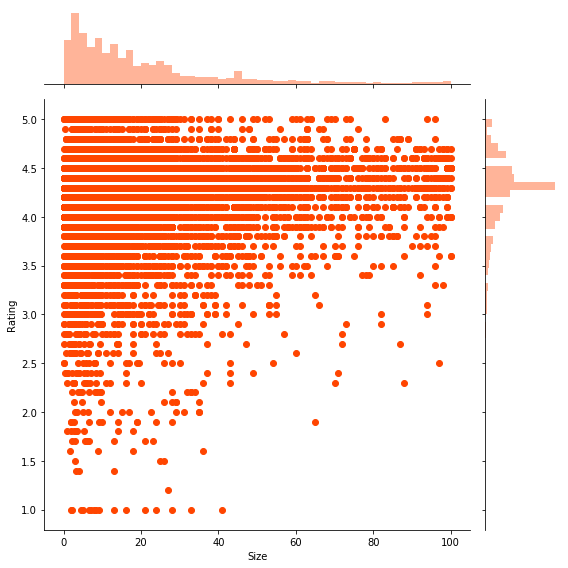

In [23]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=Size_copy, size = 8)

通过观察统计数据，发现数据的标准差很大。但是Size这个属性中，有很多APP的大小最大为1e9B，最小为1e6B。数值都在正常范围以内，且我们从散点图中，并未发现明显的异常值。因此这一特征我们认为是没有异常值。

In [24]:
Size_copy.to_csv('appstorev1.2.csv')

### 特征3：Price

#### 查看特征信息

In [25]:
price_copy = Size_copy.copy()
price_copy["Price"].value_counts()

0          9589
$0.99       146
$2.99       125
$1.99        73
$4.99        70
$3.99        60
$1.49        46
$5.99        27
$2.49        25
$9.99        19
$6.99        12
$399.99      12
$4.49         9
$14.99        9
$3.49         7
$7.99         7
$19.99        5
$8.99         5
$5.49         5
$29.99        5
$6.49         5
$12.99        4
$24.99        4
$2.00         3
$1.00         3
$11.99        3
$10.00        2
$3.95         2
$10.99        2
$13.99        2
           ... 
$1.20         1
$109.99       1
$28.99        1
$394.99       1
$46.99        1
$74.99        1
$4.85         1
$1.96         1
$19.90        1
$379.99       1
$3.04         1
$2.90         1
$33.99        1
$1.61         1
$154.99       1
$4.29         1
$2.59         1
$4.80         1
$2.95         1
$389.99       1
$5.00         1
$3.28         1
$15.46        1
$200.00       1
$79.99        1
$3.61         1
$3.02         1
$1.26         1
$1.29         1
$89.99        1
Name: Price, Length: 92,

数据中，包含非数值符号，需要删除。数据中，有92个不同的价格。

#### 特征处理

**删除非数值符号$。**

In [26]:
#用replace删除数值当中符号，并把特征中的数据类型转化为数值型。
price_copy["Price"]=price_copy["Price"].str.replace('$','').astype("float")
#price_copy["Price"].describe()
price_copy["Price"].value_counts().head(10)

0.00    9589
0.99     146
2.99     125
1.99      73
4.99      70
3.99      60
1.49      46
5.99      27
2.49      25
9.99      19
Name: Price, dtype: int64

#### 异常值检测

查看统计数据。

In [27]:
price_copy["Price"].describe()

count    10354.000000
mean         1.031099
std         16.280974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

从统计数据中我们发现，APP价格的动态范围在[0,400]之间，标准差为16.295。这里我们可以选择查看一下价格比较大APP，通过观察这些样本判断是否为异常值。

In [28]:
#查看价格大于350美金的样本
price_copy[price_copy["Price"]>300]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
3744,most expensive app (H),FAMILY,4.3,6,1.500,100+,Paid,399.99,Everyone,Entertainment
3907,💎 I'm rich,LIFESTYLE,3.8,718,26.000,"10,000+",Paid,399.99,Everyone,Lifestyle
3912,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,"10,000+",Paid,400.00,Everyone,Lifestyle
4894,I am rich,LIFESTYLE,3.8,3547,1.800,"100,000+",Paid,399.99,Everyone,Lifestyle
4897,I am Rich Plus,FAMILY,4.0,856,8.700,"10,000+",Paid,399.99,Everyone,Entertainment
4899,I Am Rich Premium,FINANCE,4.1,1867,4.700,"50,000+",Paid,399.99,Everyone,Finance
4900,I am extremely Rich,LIFESTYLE,2.9,41,2.900,"1,000+",Paid,379.99,Everyone,Lifestyle
4901,I am Rich!,FINANCE,3.8,93,22.000,"1,000+",Paid,399.99,Everyone,Finance
4902,I am rich(premium),FINANCE,3.5,472,0.942,"5,000+",Paid,399.99,Everyone,Finance
4905,I Am Rich Pro,FAMILY,4.4,201,2.700,"5,000+",Paid,399.99,Everyone,Entertainment


这些数据并没有明显异常。

数据可视化，绘制一下散点图，观察数据变换趋势。

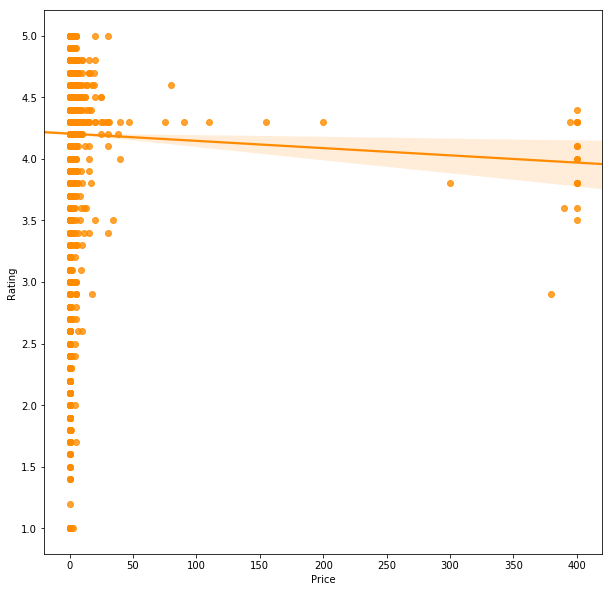

In [29]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data= price_copy)

从散点图我们可以看出，价格对评分的影响不大，但是如果APP价格设置的过高，会影响评分。

#### 保存文件

In [30]:
price_copy.to_csv('appstorev1.3.csv')